In [1]:
from astropy.io import ascii
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import asarray as ar, exp
from scipy.optimize import curve_fit, least_squares
import re
%matplotlib inline

snls_colors = {"sdssg":"darkgreen", "sdssi":"darkblue", "sdssr":"darkred", "sdssz":"purple"}
base_colors = {"sdssg":"green", "sdssi":"blue", "sdssr":"red", "sdssz":"magenta"}

import astropy.coordinates as coord
import astropy.units as u
import Utils.DiaSourceTools as DSTools

In [2]:
from scipy.stats import sigmaclip

def normalize_light_curve(lc1, lc2, filter):
   
    l1 = lc1[lc1['bandpass']==filter]
    l2 = lc2[lc2['bandpass']==filter]
    norm = []
    for row1 in l1:
        for row2 in l2:
            if int(row1["mjd"]) == int(row2["mjd"]):
                norm.append(row1["flux"]/row2["flux"])
                
    c_array = sigmaclip(norm, low=1.5, high=1.5)
    return c_array.clipped.mean()

In [3]:
def show_multi_filter_light_curve(t, colors, n_factor = None, conv='.'):
   
    t_by_filter = t.group_by("bandpass")

    indices = t_by_filter.groups.indices
    
    #print indices
    for i in range(0, len(indices)-1):
        
        data = t_by_filter[indices[i]:indices[i+1]]
        
        if n_factor is not None:
            value = n_factor[data[0]["bandpass"]]
            f = value if np.isnan(value) == False else 1
            plt.errorbar(data["mjd"], data["flux"]*f,yerr=data["flux_error"]*f, fmt=conv, markersize='5', label=data[0]["bandpass"], c=colors[data[0]["bandpass"]])            
        else:
            plt.errorbar(data["mjd"], data["flux"],yerr=data["flux_error"], fmt=conv, markersize='5', label=data[0]["bandpass"], c=colors[data[0]["bandpass"]])
    plt.legend()
    #plt.show()

In [4]:
f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table9.dat.txt','r')
data_elems = f.read()
elems = re.findall('^(.*?D3.*?)\\|(.*?)\\|', data_elems, re.MULTILINE)
f.close()

f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table10.dat.txt','r')
data = f.read()
f.close()


In [67]:
def match_with_lc(snls_array, stack_lc):
    matches = []
    for lc in snls_array:
        #print "light curve"
        val = {"ra":lc[0]["ra"], "dec":lc[0]["dec"]}
        #print np.rad2deg(lc[0]["ra"]), np.rad2deg(lc[0]["dec"])
        for i, slc in enumerate(stack_lc):

            comp = {"ra":np.mean(slc["ra"]), "dec":np.mean(slc["dec"])}
            if DSTools.source_distance(val, comp)<1:
                print i
                matches.append((lc,slc))


    print len(matches)
    return matches

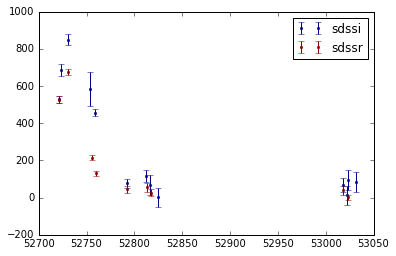

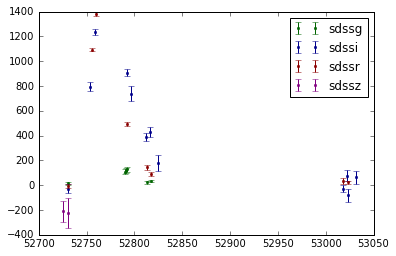

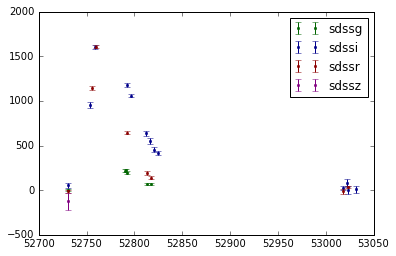

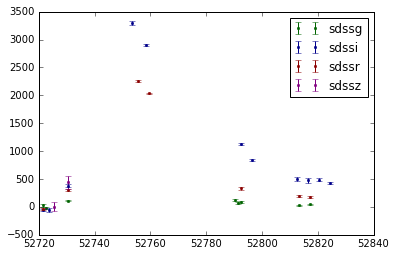

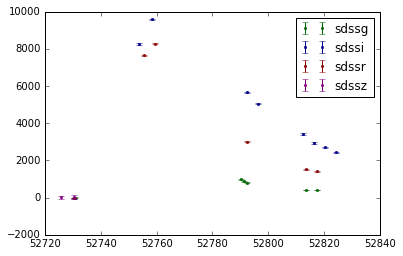

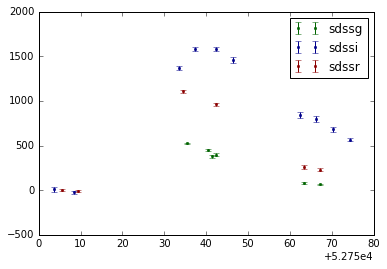

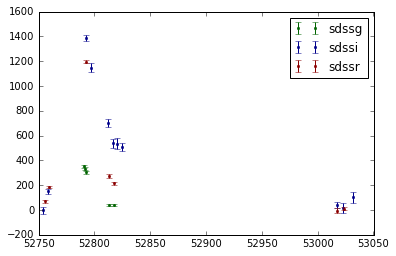

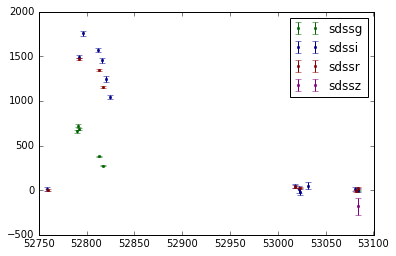

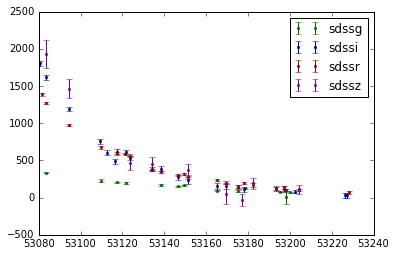

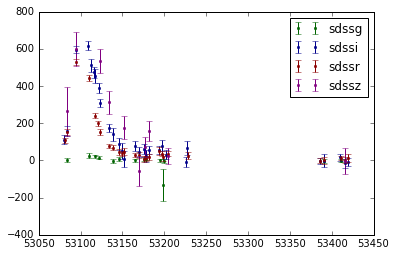

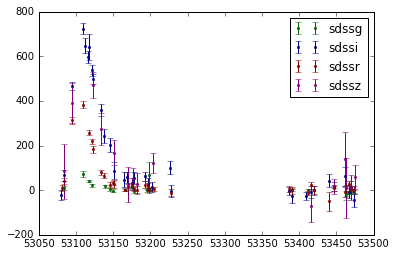

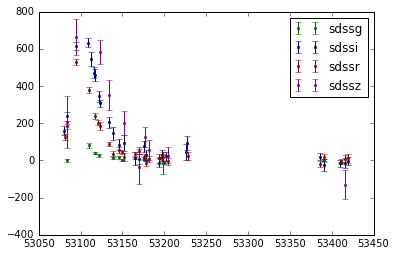

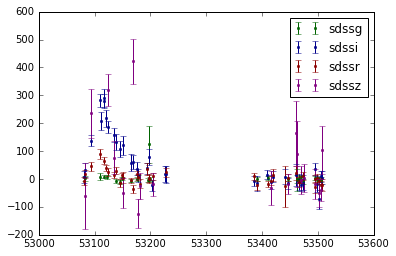

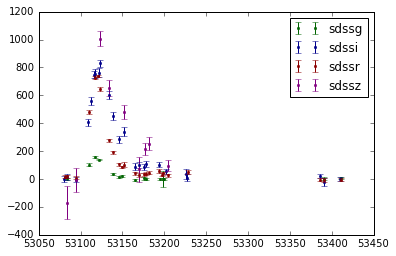

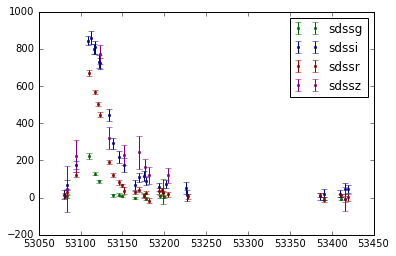

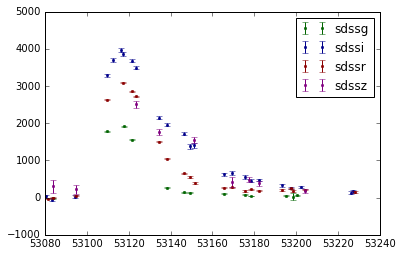

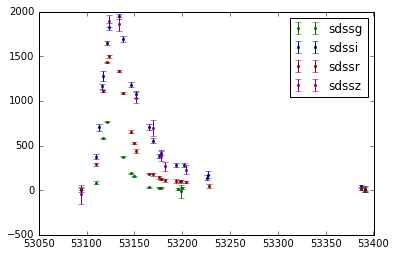

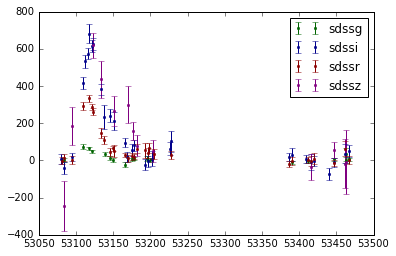

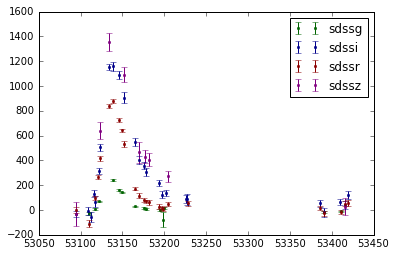

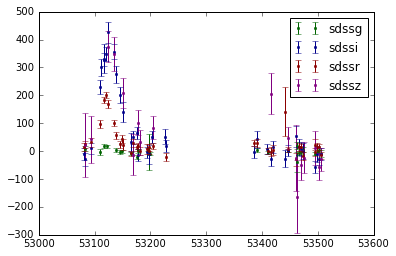

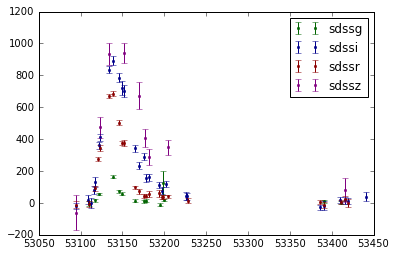

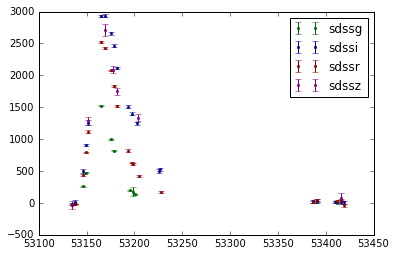

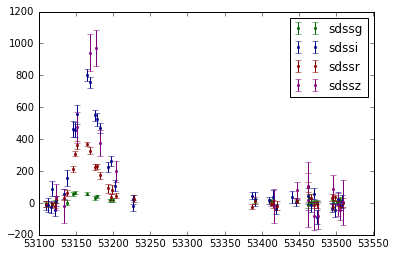

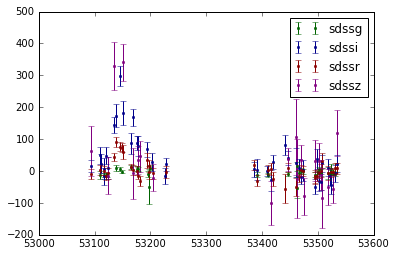

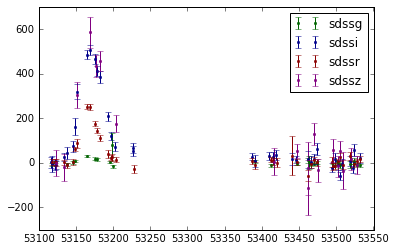

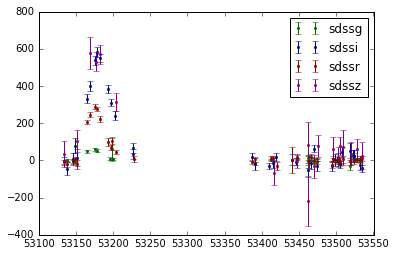

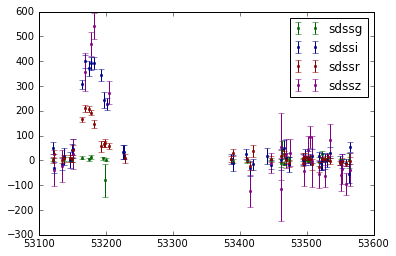

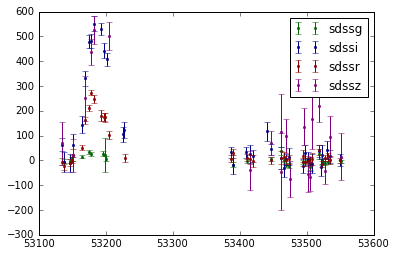

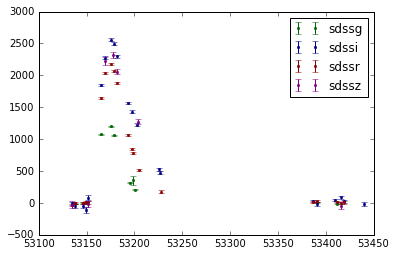

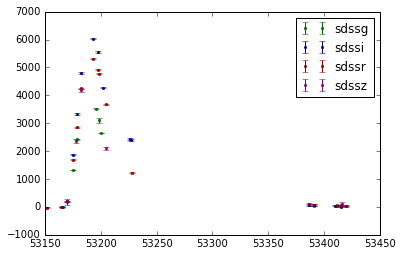

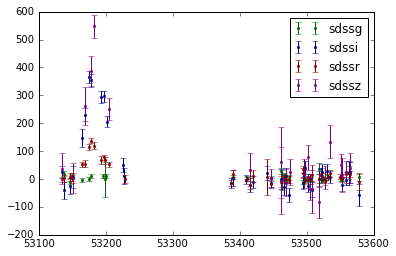

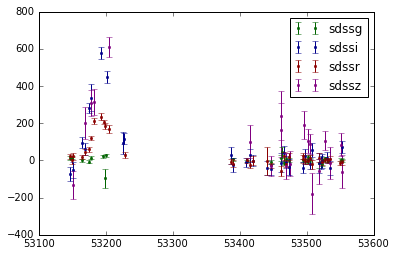

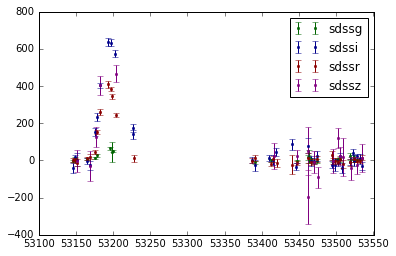

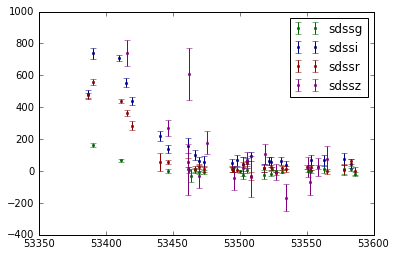

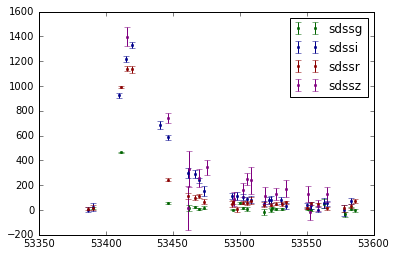

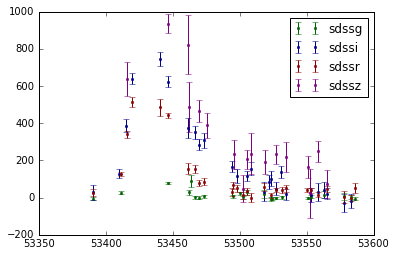

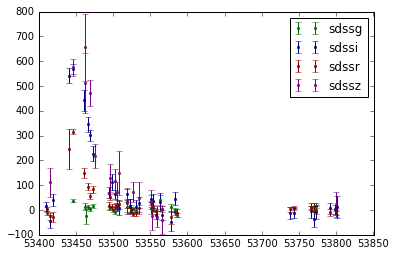

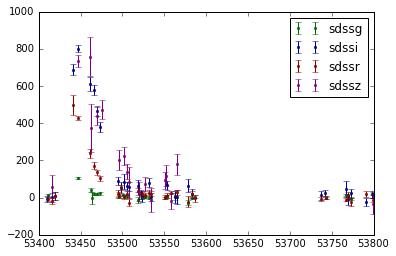

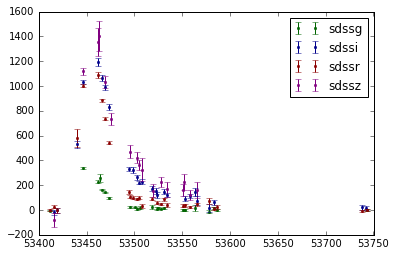

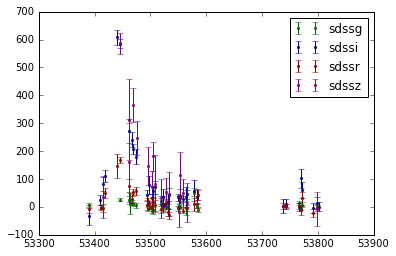

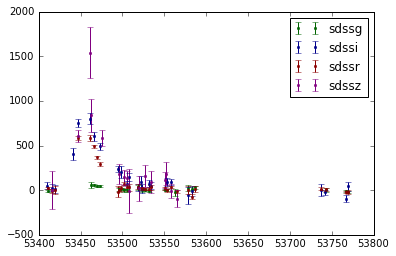

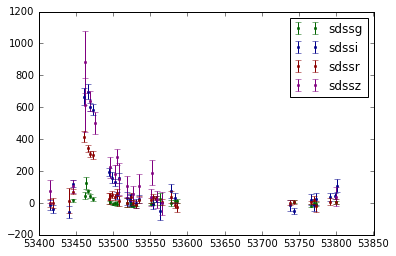

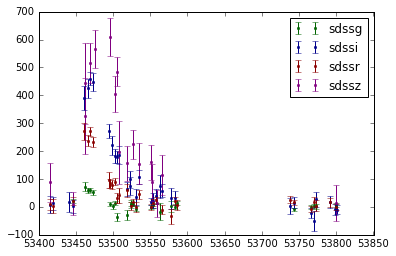

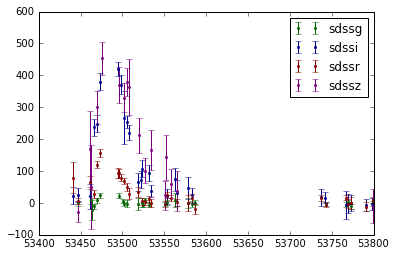

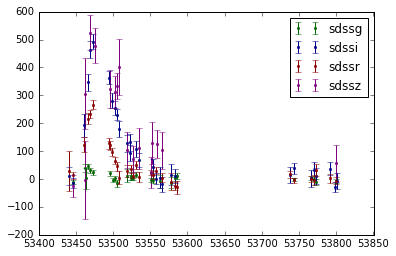

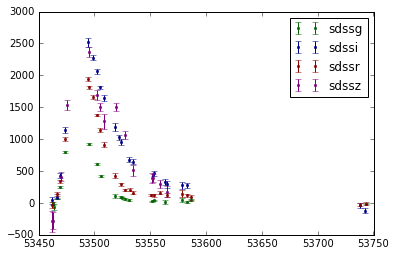

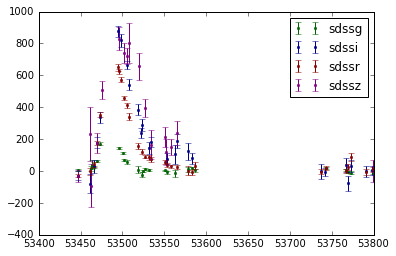

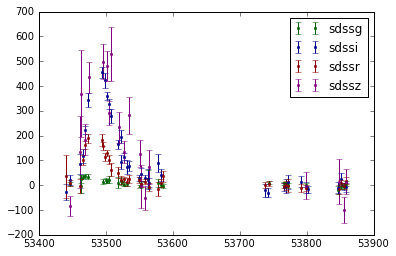

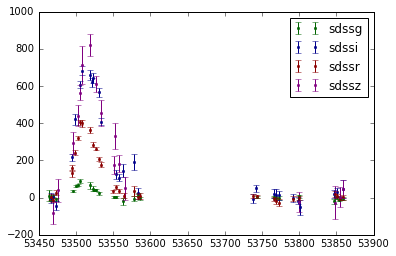

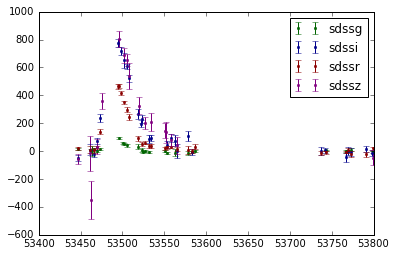

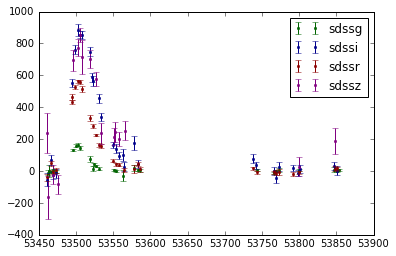

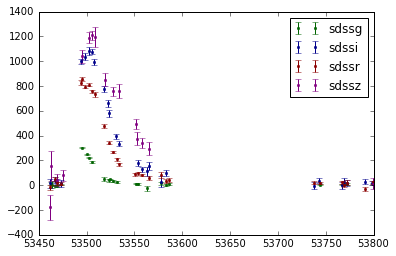

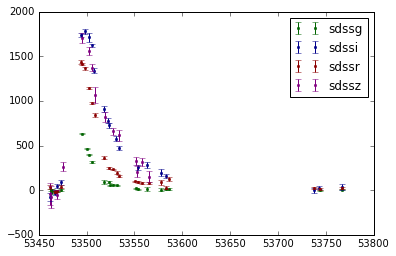

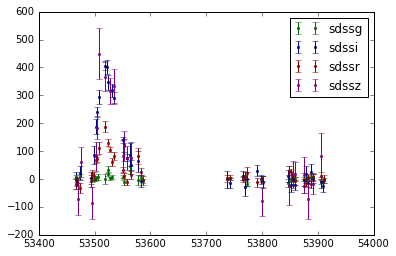

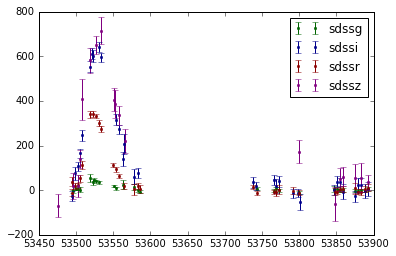

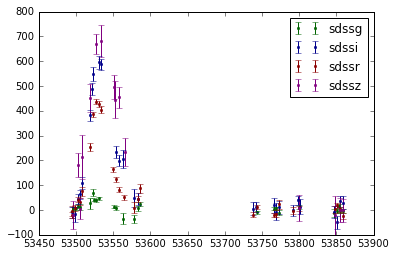

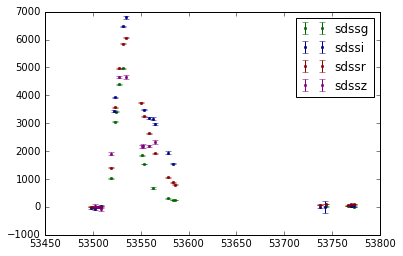

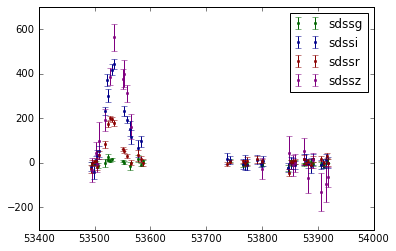

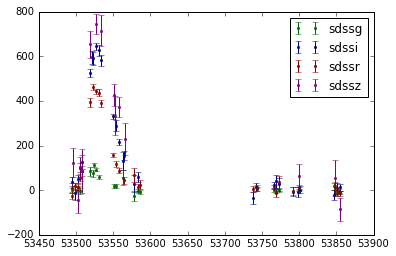

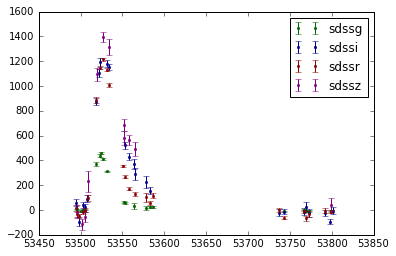

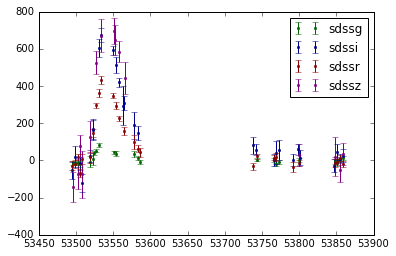

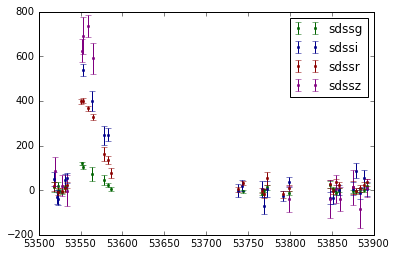

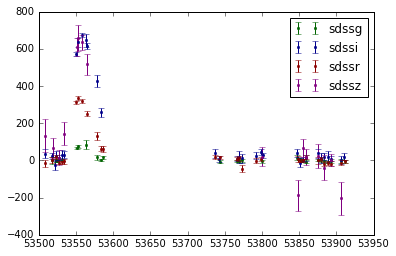

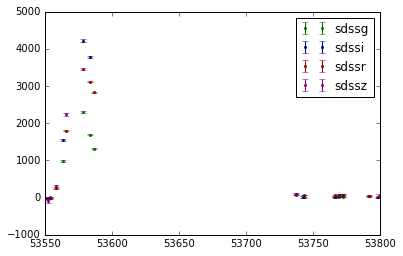

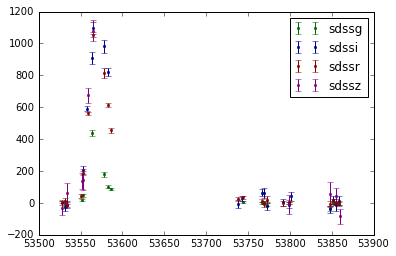

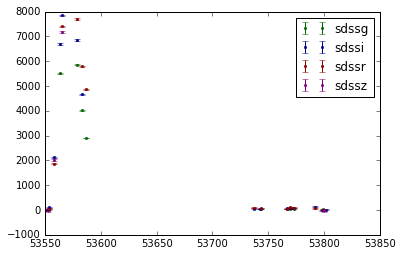

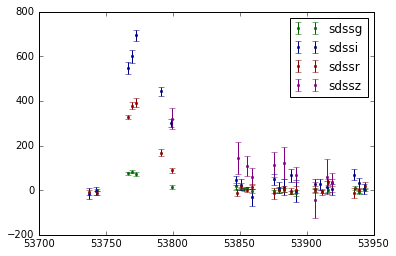

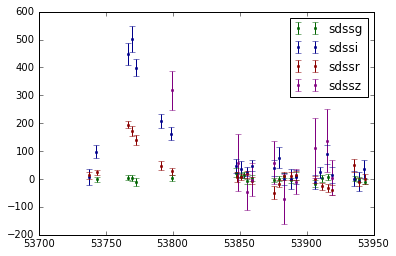

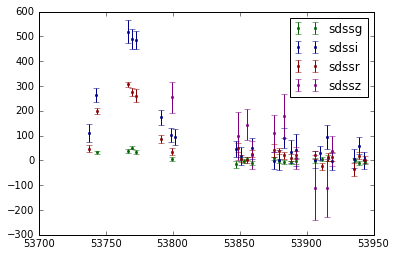

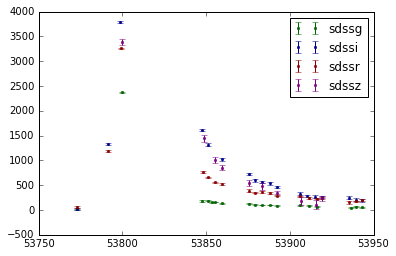

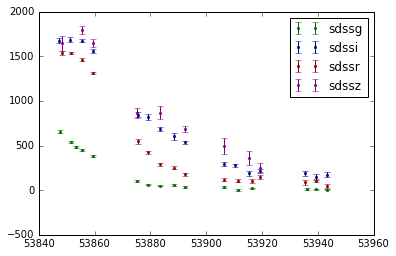

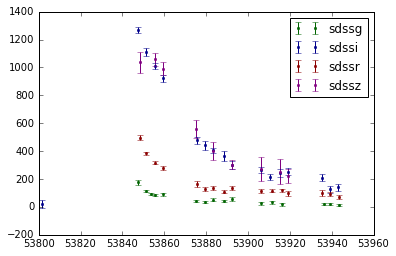

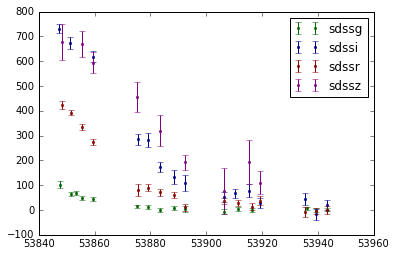

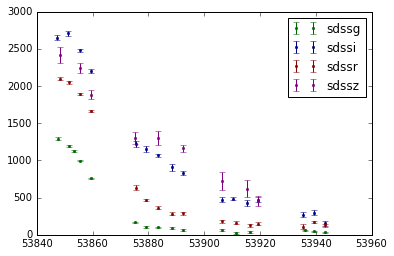

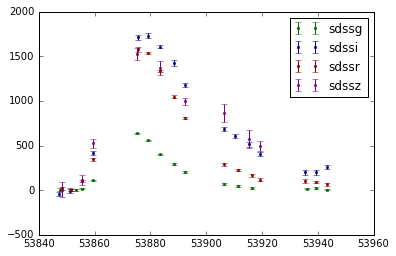

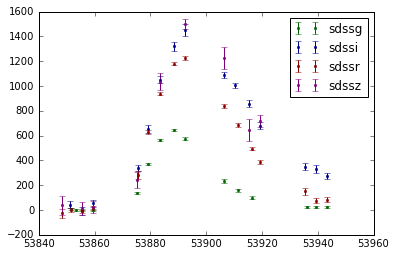

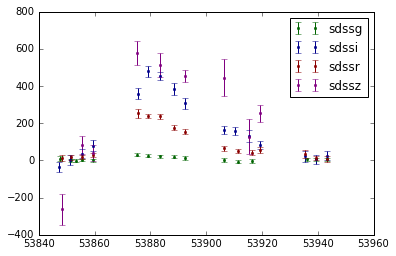

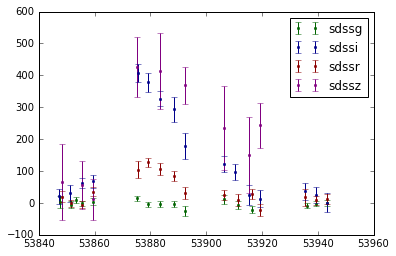

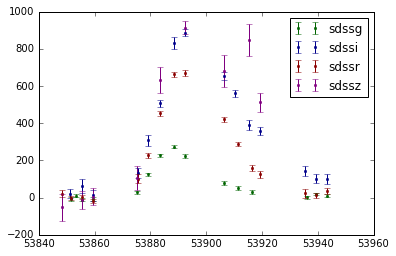

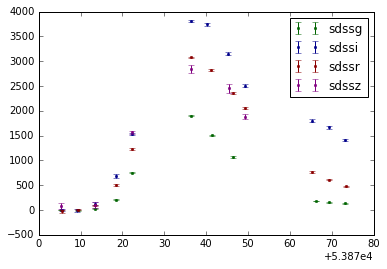

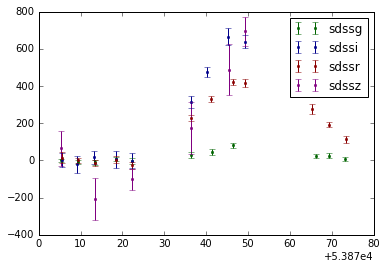

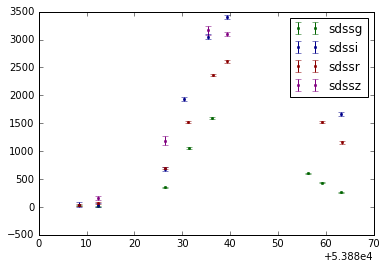

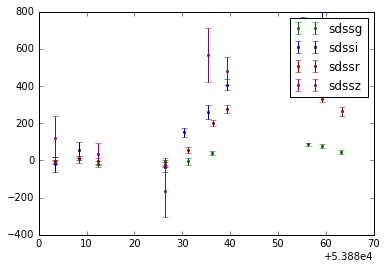

total of sn:83


In [5]:
snls_array = []
for sn in elems:

        c = coord.SkyCoord(sn[-1], unit=(u.hourangle, u.deg))

        m = re.findall('^'+str(sn[0])+'\\|(r|g|z|i)\\|(.*?)\\|(.*?)\\|(.*?)$', data, re.MULTILINE)

        snls_lc = DSTools.build_light_curve_from_snls_file(m, c)

        if len(m)>0:
            #print sn[0], c.ra.deg, c.dec.deg

            #plt.errorbar(snls_lc['mjd'], snls_lc['flux'], yerr=snls_lc['flux_error'], fmt='.', color='blue')
            show_multi_filter_light_curve(snls_lc, snls_colors)
            plt.show()
            snls_array.append(snls_lc)

print("total of sn:" + str(len(snls_array)))


In [6]:
print len(snls_array)
print len(matched)
print matched[0]

83


NameError: name 'matched' is not defined

In [2]:
lienObj = glob.glob("/datadec/cppm/jpreyes/mpi_tests/multicolour_set/*.dat")

In [3]:
len(lienObj)

613639

In [4]:
lcs = []
for oj in lienObj:
    table = ascii.read(oj)
    lcs.append(table)
    


In [9]:
s_candidates= []
for lc in lcs:
    t_by_filter = lc.group_by("bandpass")

    indices = t_by_filter.groups.indices
    if len(indices)>=3:
        s_candidates.append(lc)

In [10]:
len(s_candidates)

51380

In [29]:
mjd_std = []
mjd_med = []
for s in s_candidates:
    mjd_std.append(np.std(s["mjd"]))
    mjd_med.append(np.median(s["mjd"]))

(array([   156.,    445.,   2211.,   5588.,   7050.,  13987.,  14220.,
          5228.,   2269.,    226.]),
 array([   2.92498813,   77.57918148,  152.23337484,  226.88756819,
         301.54176154,  376.1959549 ,  450.85014825,  525.5043416 ,
         600.15853496,  674.81272831,  749.46692166]),
 <a list of 10 Patch objects>)

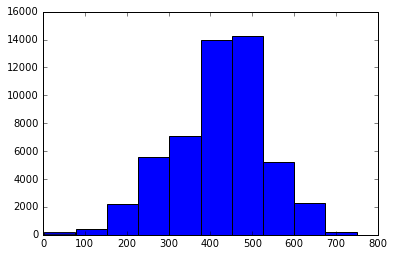

In [27]:
plt.hist(mjd_std)


In [33]:
flux_val = []
for s in s_candidates:
        for p in s:
            flux_val.append(p["flux"])

In [42]:
f_sigma = np.std(flux_val)*5
sigma = np.std(flux_val)

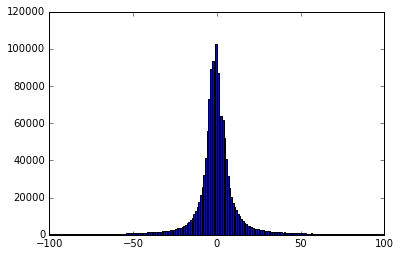

In [46]:
plt.hist(flux_val, bins=200,range=(-100,100))
#plt.axvline(x=sigma)
#plt.axvline(x=-sigma)
plt.show()

In [50]:
np.mean(flux_val)
np.std(flux_val)

1483.9784389749393

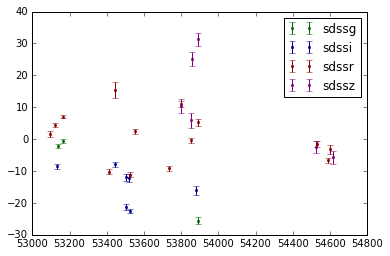

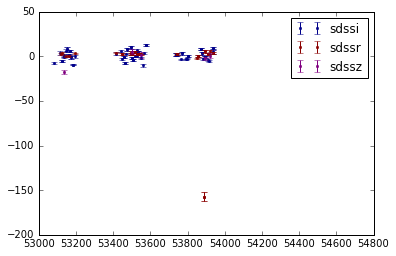

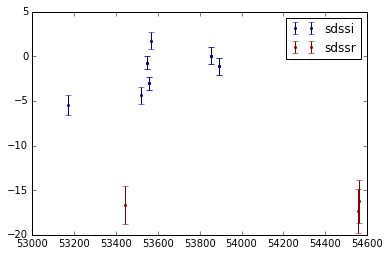

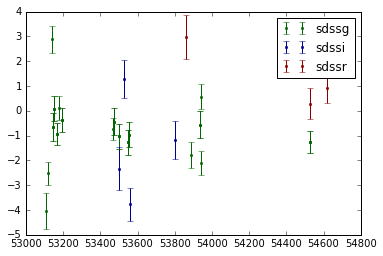

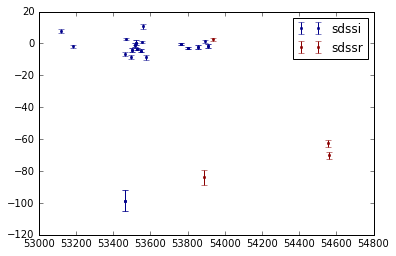

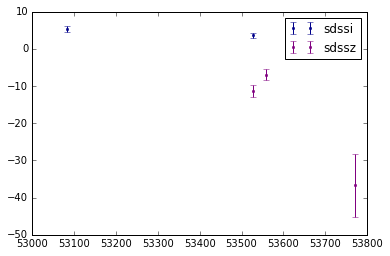

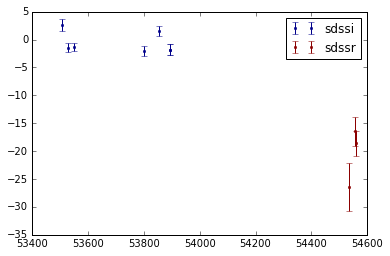

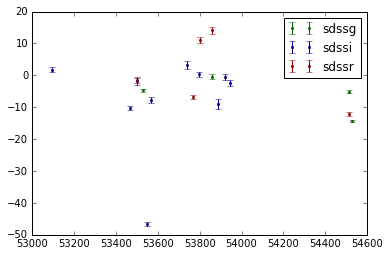

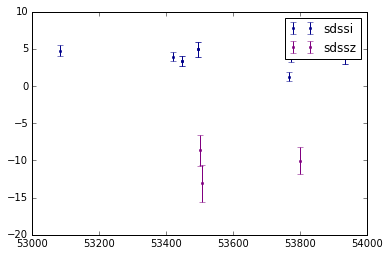

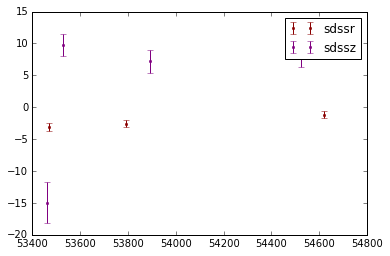

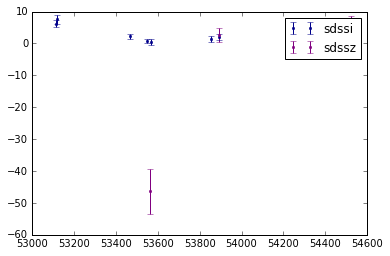

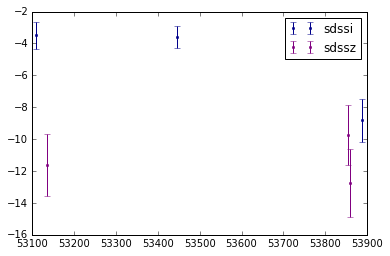

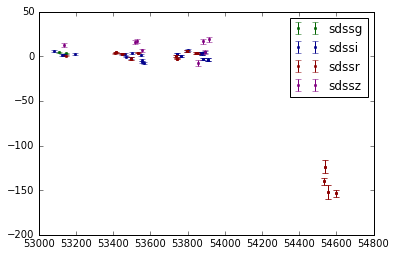

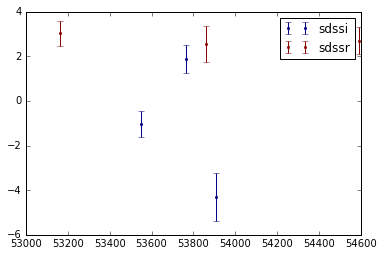

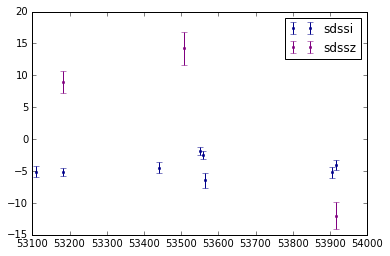

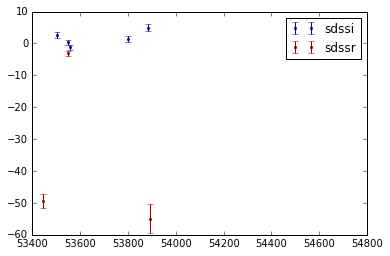

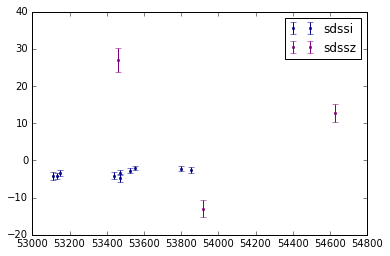

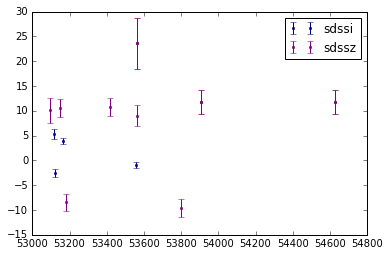

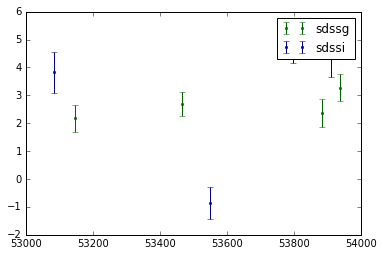

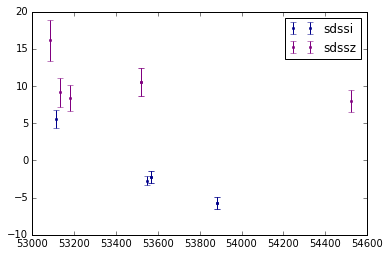

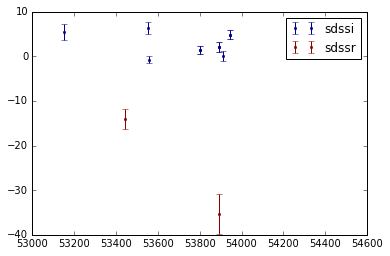

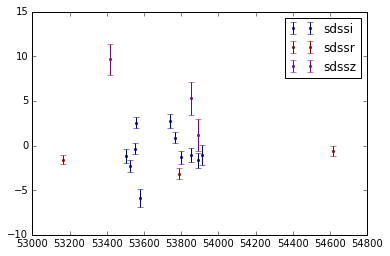

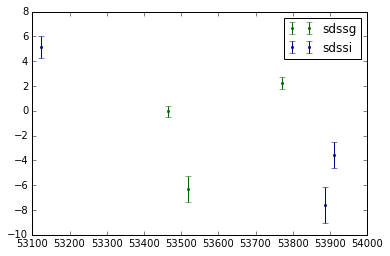

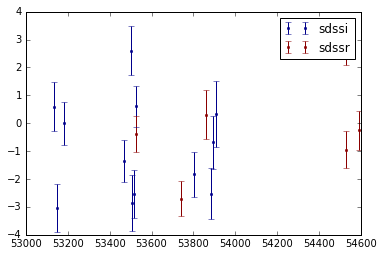

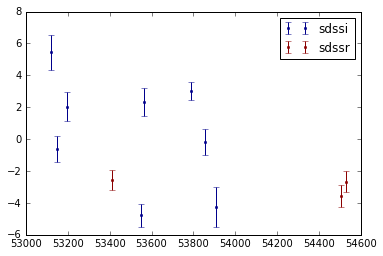

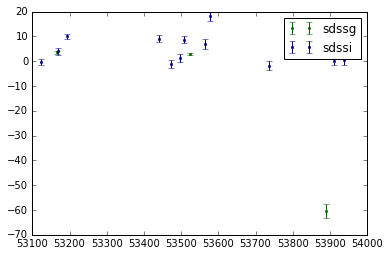

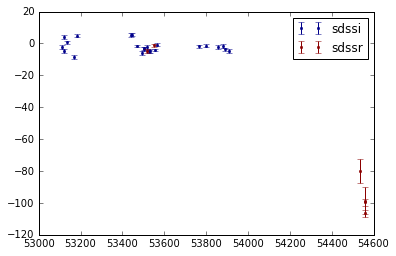

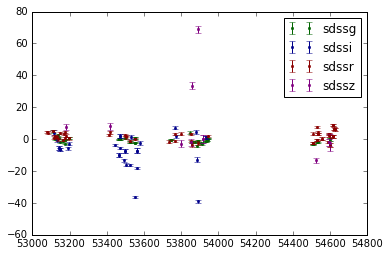

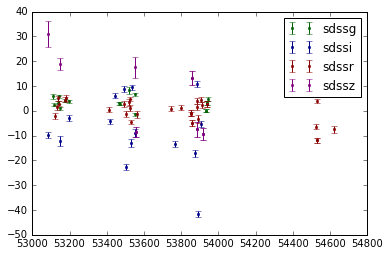

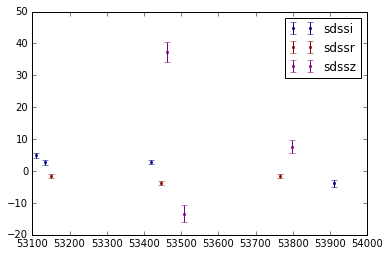

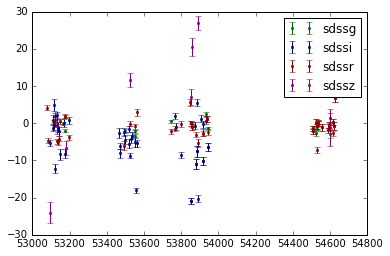

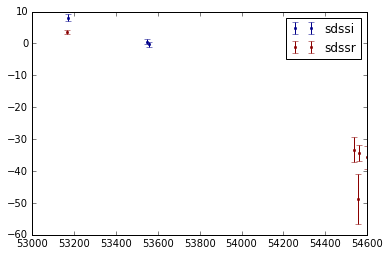

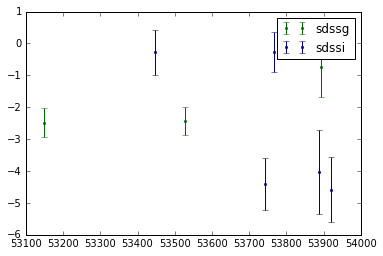

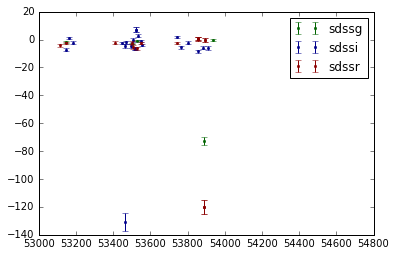

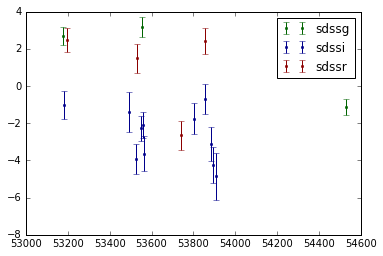

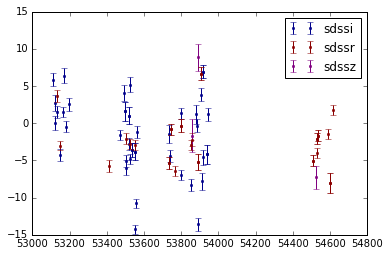

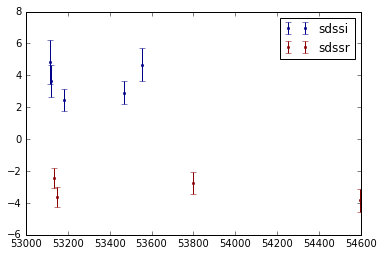

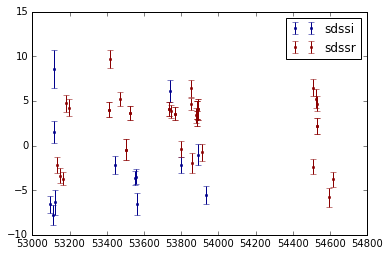

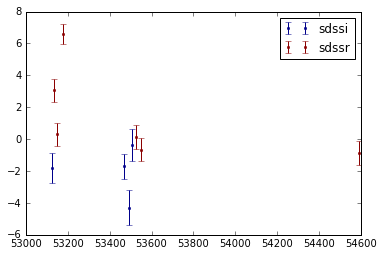

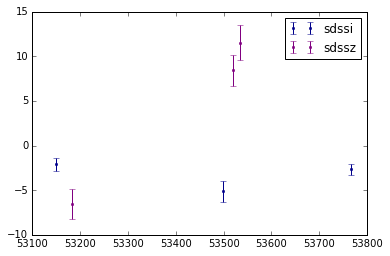

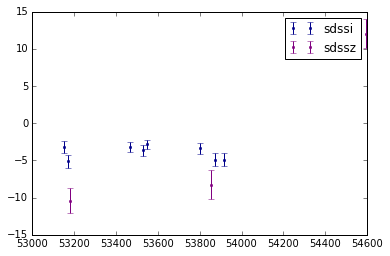

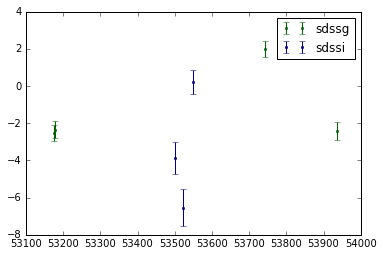

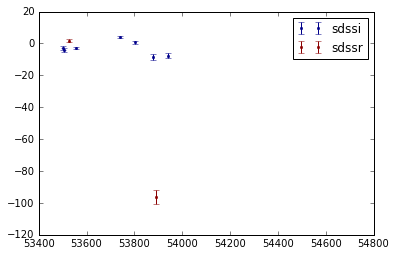

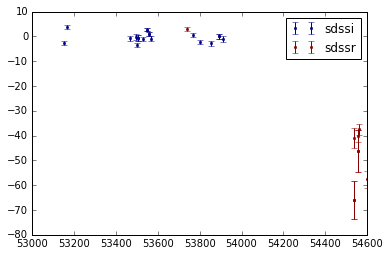

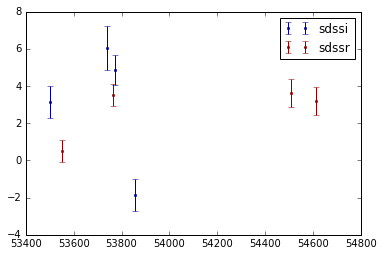

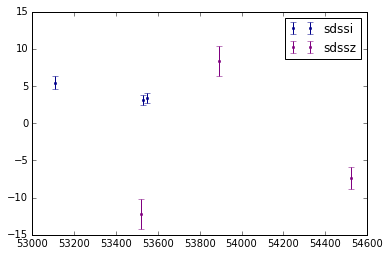

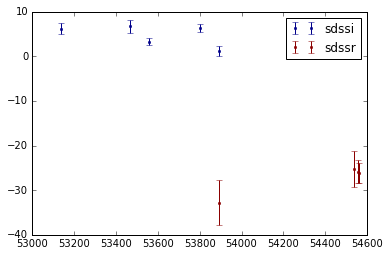

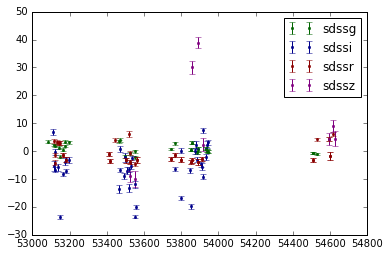

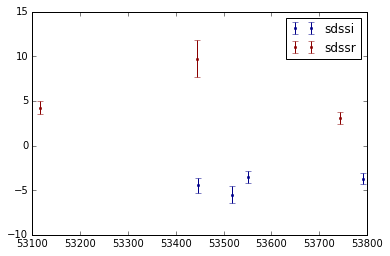

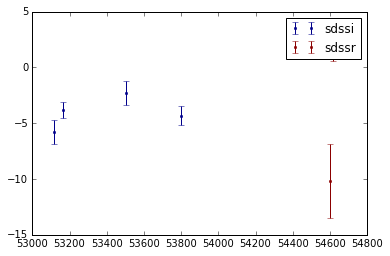

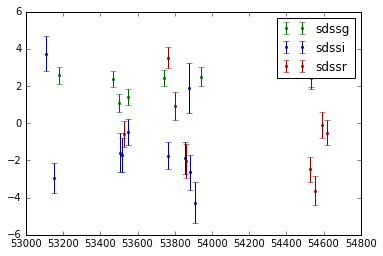

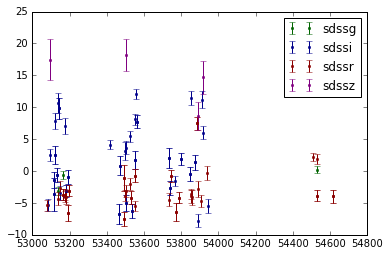

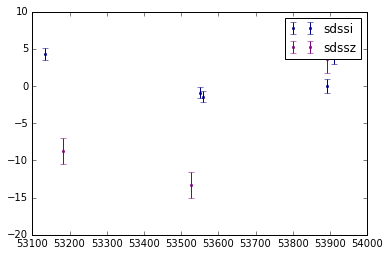

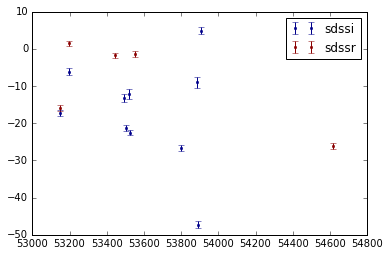

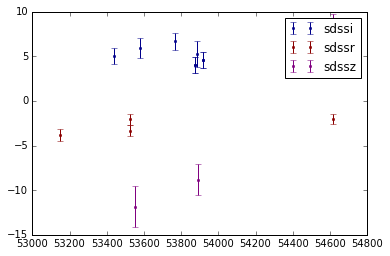

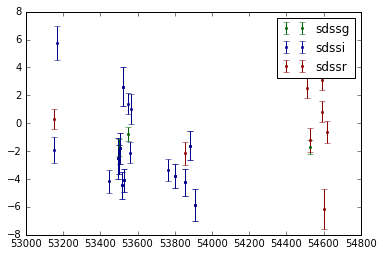

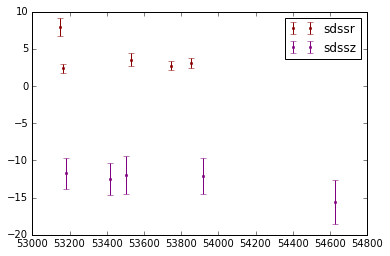

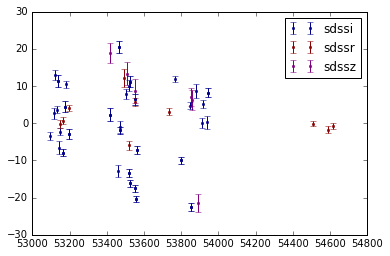

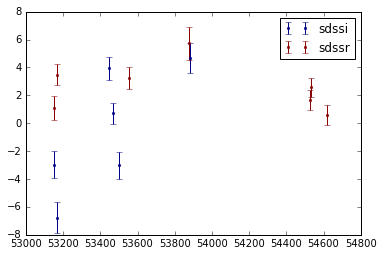

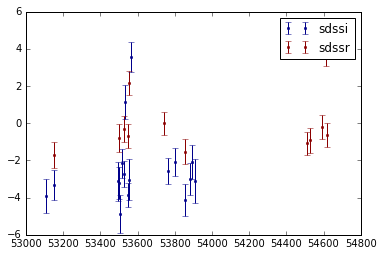

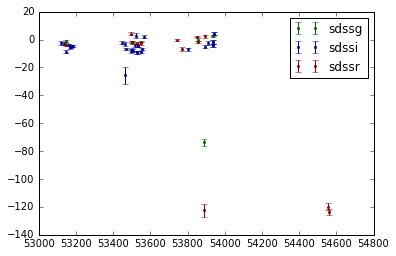

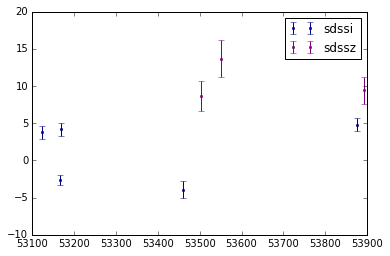

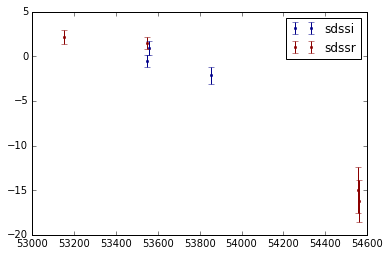

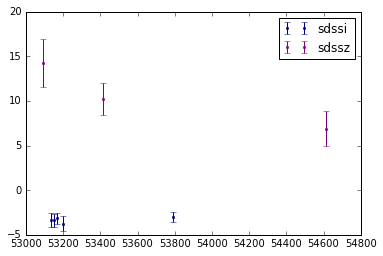

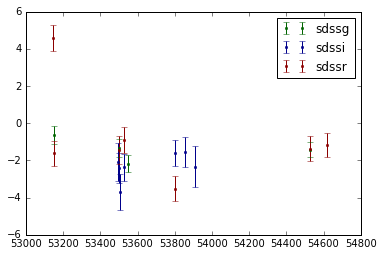

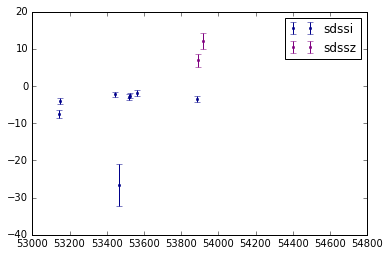

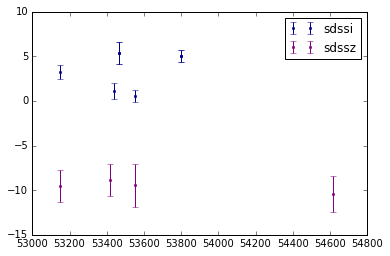

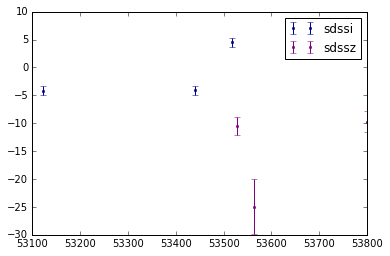

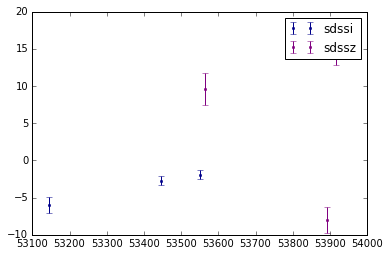

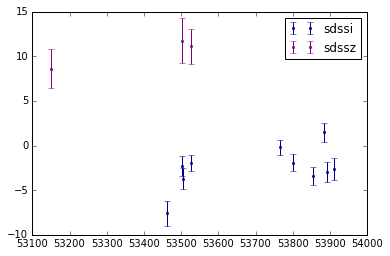

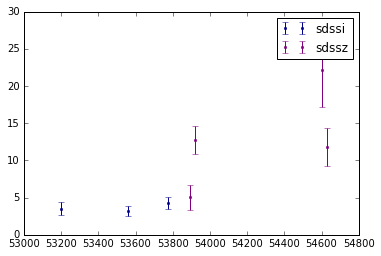

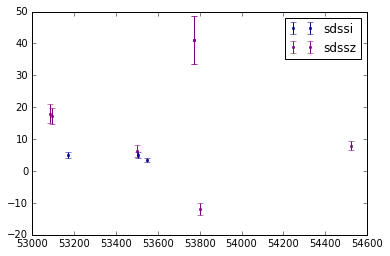

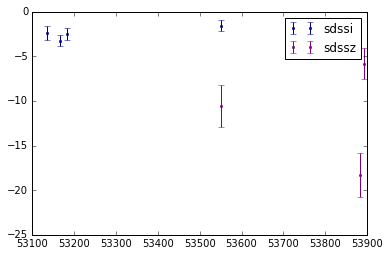

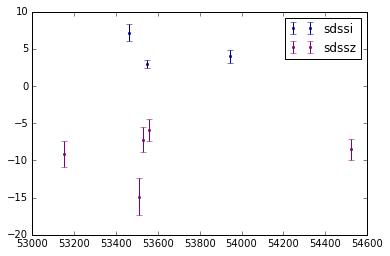

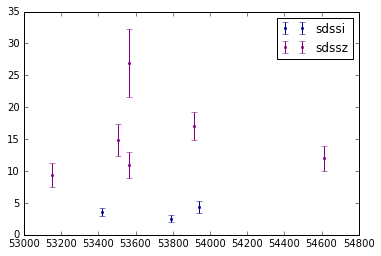

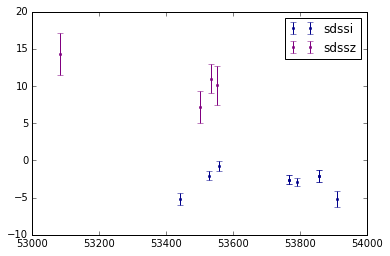

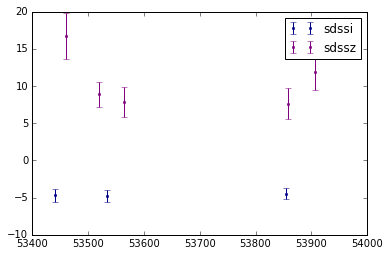

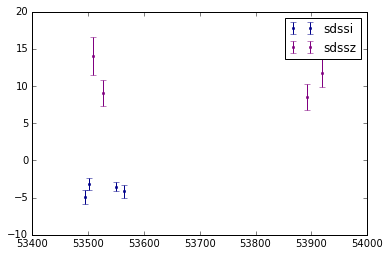

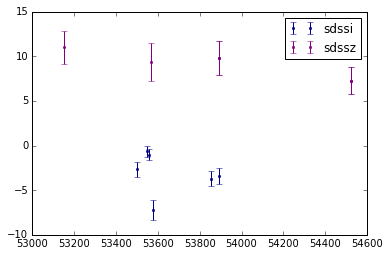

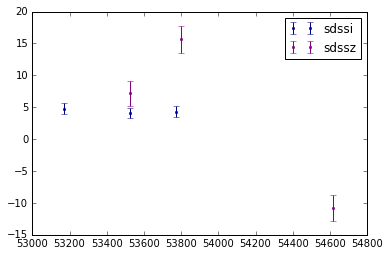

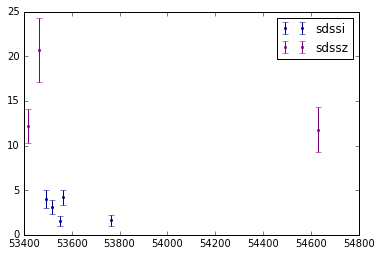

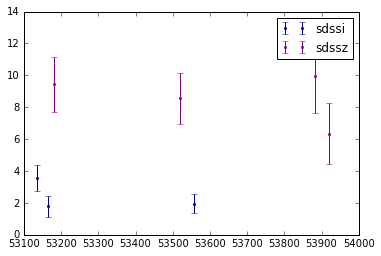

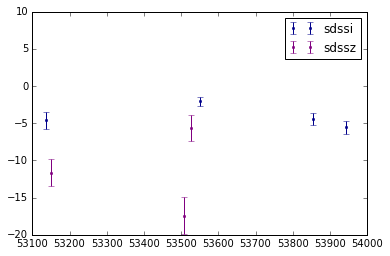

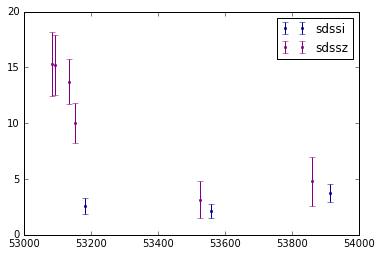

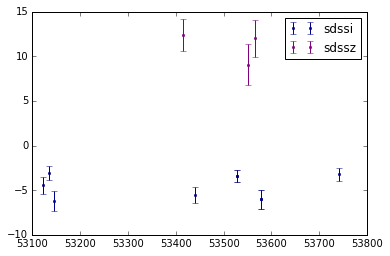

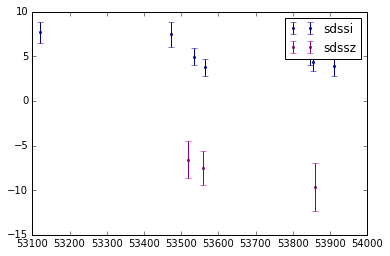

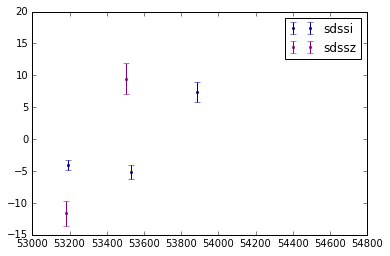

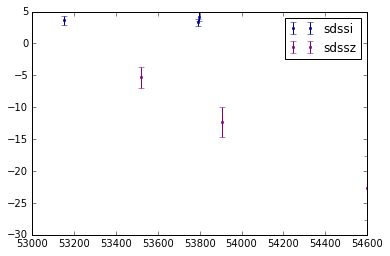

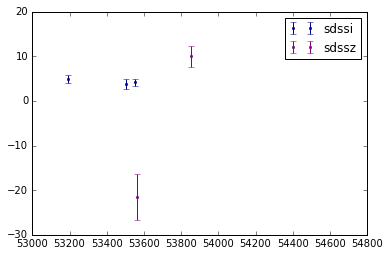

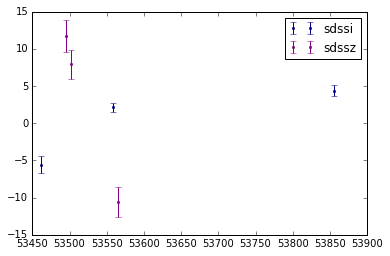

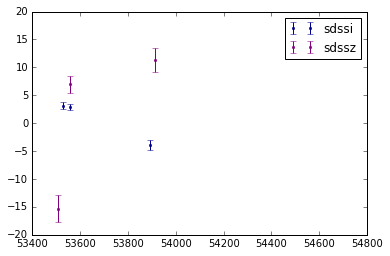

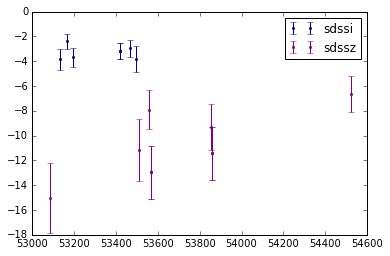

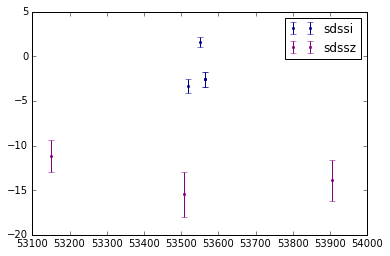

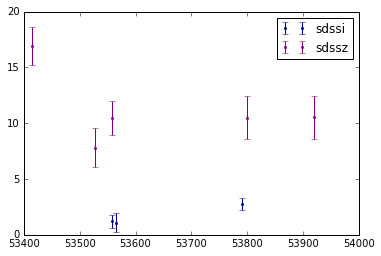

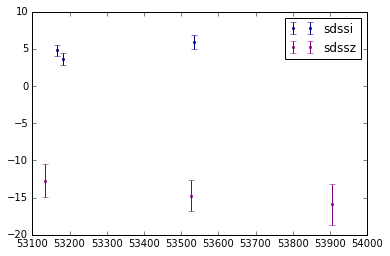

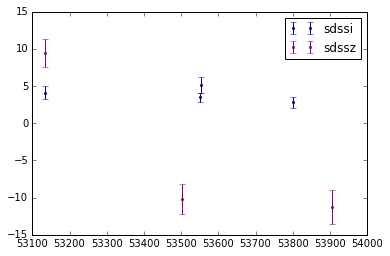

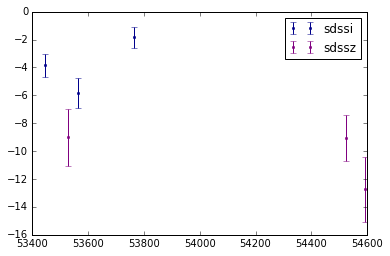

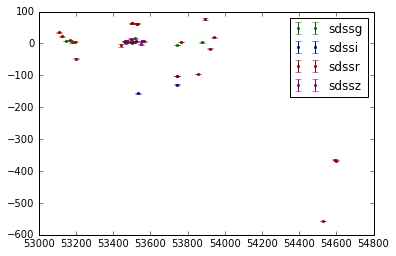

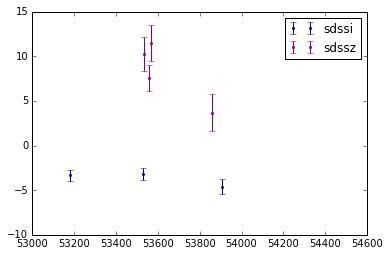

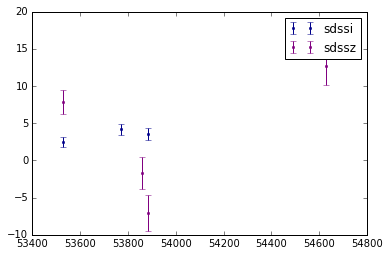

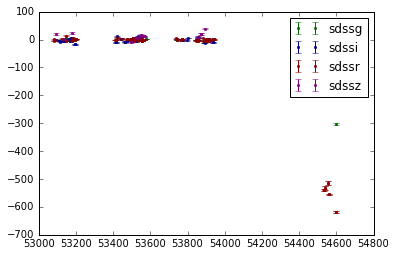

In [49]:
count = 0
max_v = 100
for s in s_candidates:
    show_multi_filter_light_curve(s, snls_colors)
    plt.show()
    count+=1
    if count>max_v:
        break

In [73]:
A = [10,23,43,42,21]
B = [8,2,1,1,2]



In [101]:
a=np.std(A, ddof=1)
b=np.std(B, ddof=1)
print a, b

14.3073407732 2.94957624075


In [92]:
print np.std(A+B, ddof=1)
np.var(A+B, ddof=1)

16.3846133783


268.45555555555552

In [90]:
c = ((4)*(a**2+b**2))/((10-2))
print c, np.sqrt(c)

106.7 10.3295692069


In [80]:
np.mean(A)

27.800000000000001

In [96]:
np.var([5,6,1,-4,3,7,8], ddof=1)

17.238095238095237

In [100]:
np.std([31, 30, 29, 42, 41, 40, 39, 31, 28, 23, 22, 21, 19, 18, 21, 20, 19, 18,17], ddof=1)

8.5996055941112211

In [19]:
thres_c = []
for s in s_candidates:
    mask = s["flux"]>8

    if len(s[mask])>0:
        thres_c.append(s[mask])


In [50]:
len(thres_c)

29364

In [44]:
count = 0
s04 = []
for t in thres_c:
    if len(t) >= 3:
        mask = (t["mjd"]>53080) & (t["mjd"]<53135)

        mked =  t[mask]
        if len(mked)>0:
            s04.append(mked)
        
print count

0


In [45]:
count = 0
s05 = []
for t in thres_c:
    if len(t) >= 3:
        mask = (t["mjd"]>53408) & (t["mjd"]<53584)

        mked =  t[mask]
        if len(mked)>0:
            s05.append(mked)
        
print count

0


In [46]:
count = 0
s06 = []
for t in thres_c:
    if len(t) >= 3:
        mask = (t["mjd"]>53736) & (t["mjd"]<53943)

        mked =  t[mask]
        if len(mked)>0:
            s06.append(mked)
        
print count

0


In [47]:
count = 0
s08 = []
for t in thres_c:
    if len(t) >= 3:
        mask = (t["mjd"]>54510) & (t["mjd"]<54630)

        mked =  t[mask]
        if len(mked)>0:
            s08.append(mked)
        
print count

0


In [49]:
print len(s04)+len(s05)+len(s06)+len(s08)

51392


In [55]:
count = 0
for t in s04:
    if len(t) > 20:
        print t
        count+=1
print count

  mjd   classification zpsys ...   magnitude   magnitude_error    ref_flux  
------- -------------- ----- ... ------------- --------------- -------------
53083.0            7.0    ab ... 26.0917172466 0.0915134530806 66.6369171143
53123.0            0.0    ab ... 26.4528962933  0.094035357186 66.6369171143
53083.0            6.0    ab ... 26.6316446203 0.0366576688278 55.0561065674
53094.0            6.0    ab ... 26.5122922673 0.0336048438395 55.0561065674
53109.0            6.0    ab ... 26.4753217207 0.0380377453476 55.0561065674
53112.0            7.0    ab ... 26.4979287085 0.0481898166174 55.0561065674
53116.0            7.0    ab ... 26.5467465067 0.0476384298047 55.0561065674
53117.0            7.0    ab ... 26.3056117287 0.0593623203665 55.0561065674
53121.0            6.0    ab ... 26.4644040168 0.0454170532595 55.0561065674
53123.0            6.0    ab ... 26.5041613775  0.041037619677 55.0561065674
53134.0            6.0    ab ... 26.4106862177 0.0354852125049 55.0561065674

  mjd   classification zpsys ...   magnitude   magnitude_error    ref_flux  
------- -------------- ----- ... ------------- --------------- -------------
53094.0            7.0    ab ... 26.8030471159  0.153808820833 242.312728882
53123.0            7.0    ab ... 26.4808975544 0.0892965345403 242.312728882
53083.0            7.0    ab ... 27.1386795507 0.0637781409451 202.223052979
53094.0            7.0    ab ... 27.3187654355 0.0696048235819 202.223052979
53109.0            7.0    ab ... 27.3601279497 0.0846715151682 202.223052979
53112.0            7.0    ab ... 27.1872089167  0.111320256372 202.223052979
53116.0            7.0    ab ... 27.3058810599 0.0975252953391 202.223052979
53117.0            7.0    ab ... 27.1073816158  0.121950678722 202.223052979
53123.0            7.0    ab ... 27.5151769108  0.105247339565 202.223052979
53134.0            7.0    ab ... 27.7363448618  0.119673260689 202.223052979
53083.0            6.0    ab ... 26.7973769866 0.0335826986131 180.629379272

In [62]:
filters = []
for s in s05:

    t_by_filter = s.group_by("bandpass")

    indices = t_by_filter.groups.indices
    filters.append(len(indices)-1)


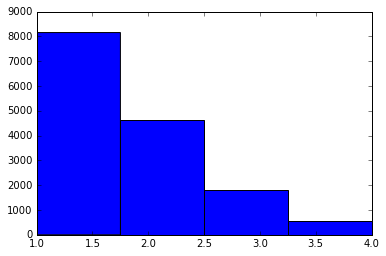

In [63]:
plt.hist(filters, bins=4)
plt.show()

In [64]:
snls_array

[<Table length=22>
   mjd    zpsys   flux        ra      flux_error      dec          zp   bandpass
 float64   str2 float64    float64     float64      float64     float64   str5  
 -------- ----- ------- ------------- ---------- -------------- ------- --------
 52721.54    ab  528.11 3.75790310089     19.791 0.916953761726    25.0    sdssi
 52721.59    ab  526.52 3.75790310089      17.93 0.916953761726    25.0    sdssr
  52723.6    ab  687.26 3.75790310089     31.252 0.916953761726    25.0    sdssi
 52730.44    ab  848.87 3.75790310089     29.197 0.916953761726    25.0    sdssi
 52730.49    ab  674.83 3.75790310089     15.149 0.916953761726    25.0    sdssr
 52753.55    ab  583.25 3.75790310089     91.767 0.916953761726    25.0    sdssi
 52755.48    ab   214.5 3.75790310089     12.675 0.916953761726    25.0    sdssr
 52758.44    ab   457.5 3.75790310089     19.898 0.916953761726    25.0    sdssi
 52759.46    ab  131.27 3.75790310089     12.784 0.916953761726    25.0    sdssr
 52792.35

In [66]:
len(snls_array)

83

In [68]:
m04 = match_with_lc(snls_array, s04)
print len(m04)

5702
6733
788
5604
6965
8521
2010
1589
2543
5329
4229
8338
6453
2400
14
14


In [69]:
m05 = match_with_lc(snls_array, s05)
print len(m05)

2773
14014
581
13474
11674
2389
9853
10330
8548
7767
7229
8497
8502
2004
4953
6986
14881
2146
13558
286
7753
10659
5861
11927
4020
7155
1758
14899
10206
4013
4775
10887
10850
13909
3643
11907
5318
37
37


In [70]:
m06 = match_with_lc(snls_array, s06)

11570
2818
11575
2034
4440
5036
10349
4079
973
12842
11913
7989
4296
1560
5121
14129
3686
7730
9042
7442
12079
8268
2895
5406
6750
25


In [71]:
m08 = match_with_lc(snls_array, s08)

8143
2239
8246
11322
4


In [72]:
matches_sc = match_with_lc(snls_array, s_candidates)

41621
33218
39979
4614
32534
41285
51207
11598
9449
14546
30854
24411
50072
38204
21642
44053
15057
16502
16603
16868
47667
36450
8186
30434
35702
27635
1912
45674
39072
8199
32302
34242
27933
25340
23693
27747
27769
6845
16114
22911
50431
7426
45985
791
25300
35487
19303
39984
13369
23460
6020
50501
26713
33667
13351
15552
36261
36128
32008
3291
42348
39357
25607
13973
5198
16436
47300
12107
24824
29032
23947
39911
26438
9659
17376
21861
76
